In [1]:
from IPython.core.display import HTML
HTML( open('my_css.css').read() )
# https://anaconda.org/bfiedler/data/1/download/my_css.css

v1.31, 14 September 2018, by Brian Fiedler

*alternatives to basemap and netcdf4 are now included*

# netCDF data of Sea Surface Temperature

Here we will investigate 24 months of monthly-averaged Sea Surface Temperature data, for years 2001 and 2002. 
All 24 months can be visualized here: http://metr1313.net/~bonzo/sst.html
  
  
You will need the netCDF data file [tos_O1_2001-2002.nc](http://www.unidata.ucar.edu/software/netcdf/examples/tos_O1_2001-2002.nc)
The file is one of several offered in
[Example netCDF files](http://www.unidata.ucar.edu/software/netcdf/examples/files.html).
  
There is nothing particularly special or amazing about this data.
But it is small and easy to use. And it does show an "El Nino" event in 2002.

The data file was analyzed in a task in [METR 1313](http://metr1313.net/lessons/GriddedData), which you should study a bit.  Here we expand on what was in METR 1313, showing off the benefits of working with an ipython notebook.

We will refer to the average of temperature conditions in January 2001  and January 2002 as defining a "climate" for January.
Normally, climate averages require more than just an average of two values.  Often approximately 30 Januarys would be required to truly define a "climate" for January.
But in this educational exercise we keep the data small.  Use your imagination a bit about how your computations would 
be very similar if there were many more years in the data.  

When we look at the difference between the data for a month and the climate defined for a month, that
gives the '''anomaly'''.  Our short data does show a very meaningful anomaly, [an ENSO cycle](http://oceanservice.noaa.gov/facts/ninonina.html)

You should examine my [numpy arrays tutorial](http://metr1313.net/lessons/arrays) before proceeding with this project. You can do that tutorial by
just typing the examples into a new ipython notebook.

*Because of all the images produced, this notebook may take about a minute to run. *


# Preparing Anaconda Python

You may need to do the following for your Anaconda installation.

On your Linux or OSX terminal, or Windows Anaconda Prompt enter:

```
conda update conda
conda update anaconda
conda install netcdf4
conda install basemap
```
As of August 6, 2016 with Anaconda Python 3.5 on **Windows 10**, the last command will tell you `basemap` is unavailable.



There is a remedy:
[Anaconda does not offer basemap for Windows 10 with Python3](http://stackoverflow.com/questions/35716830/basemap-with-python-3-5-anaconda-on-windows)

That link recommends you go to [Unofficial Windows Binaries for Python Extension Packages](http://www.lfd.uci.edu/%7Egohlke/pythonlibs). From there I downloaded `basemap-1.0.8-cp35-none-win_amd64.whl`. Thank you Christoph Gohlke!

The first time I tried the `pip` command, it threw an error about a zip file. The second time, it worked!

```
[Anaconda3] C:\Users\brian\Anaconda3>pip install C:\Users\brian\Desktop\4330nb\basemap-1.0.8-cp35-none-win_amd64.whl
Processing c:\users\brian\desktop\4330nb\basemap-1.0.8-cp35-none-win_amd64.whl
Installing collected packages: basemap
Successfully installed basemap-1.0.8
```
As of October 2017, this also might be work, but I have not tried it: https://anaconda.org/conda-forge/basemap

FYI: [official documentation about anaconda packages](http://conda.pydata.org/docs/using/pkgs.html)

**netCDF4 not working? See the alternative below **

**Basemap still not working? Comment out the import statement below**


In [2]:
import os
from netCDF4 import Dataset # if not working, comment out, and see alternative below
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.basemap import Basemap # comment this out if you cannot install basemap, and see below


In [10]:
# No basemap? Edit to be: needmap=False
# This is our plotting function.
# No documentation. Just note the examples following.
def plotpixels2(lon1d,lat1d,data,lowc=None,hic=None,title=None,
         startlon=0.,outfile=None,needmap=True,caption=None,dpi=144,
               sizemult=1):
    print('...doing plotpixels:')
    lon1d=np.array(lon1d)
    lat1d=np.array(lat1d)
    delon = lon1d[1]-lon1d[0]
    delat = lat1d[1]-lat1d[0]
    lonp = np.zeros(len(lon1d)+1,'d')
    latp = np.zeros(len(lat1d)+1,'d')
    lonp[0:len(lon1d)] = lon1d-0.5*delon
    lonp[-1] = lon1d[-1]+0.5*delon
    latp[0:len(lat1d)] = lat1d-0.5*delat
    latp[-1] = lat1d[-1]+0.5*delat
    lons, lats = np.meshgrid(lonp, latp)

    if needmap:
        m = Basemap(llcrnrlon=startlon,\
            llcrnrlat=-90,urcrnrlon=startlon+360.,urcrnrlat=90.,\
            resolution='c',area_thresh=10000.,projection='cyl')
        aspectRatio=m.aspect
    else:
        aspectRatio=.5

    xsize = sizemult*plt.rcParams['figure.figsize'][0]
    fig = plt.figure(figsize=(xsize,aspectRatio*xsize))
    # https://matplotlib.org/api/api_changes.html
    # So you may need to replace axisbg with facecolor in the following:
    ax = fig.add_axes([0.08,0.1,0.7,0.7]) 

    if needmap:
        x, y = m(lons, lats)
    else:
        x,y=lons,lats
    parallels = np.arange(-90.,90.,30.)
    if startlon==-180:
        meridians = np.arange(-180.,180.,60.)
    else:
        meridians = np.arange(0.,360.,60.)
    colormap=plt.cm.jet

# Pixelate your data!
    if needmap:
        p = m.pcolor(x,y,data,cmap=colormap) 
    else:
        p = plt.pcolor(x,y,data,cmap=colormap)
#        p = plt.pcolor(x,y,data,edgecolors='w',cmap=colormap)

    if title: plt.title(title)
    cax = plt.axes([0.85, 0.1, 0.05, 0.7]) # setup colorbar axes
    datamin=data.min()
    datamax=data.max()
    if lowc==None : lowc=datamin
    if hic==None : hic=datamax
    print('min data: ',datamin,'   max data:',datamax)
    print('low color bound:',lowc,'  high color bound:',hic)
    if  datamin<lowc:
        print("warning: some data below low color bound ")
    if datamax>hic:
        print("warning: some data above high color bound")
    if datamax>1000.:
        plt.colorbar(format='%7.1e', cax=cax) # draw colorbar
    elif datamax>5.:
        plt.colorbar(format='%d', cax=cax) # draw colorbar
    else:
        plt.colorbar(format='%5.2f', cax=cax) # draw colorbar
    plt.axes(ax)  # make the original axes current again
    plt.clim(lowc,hic)
    if needmap:
        m.drawcoastlines()
        m.drawcountries()
        print('overlaying map on pixels')
#        m.drawstates()
    else:
        plt.axis( [ lonp[0], lonp[-1], latp[0], latp[-1] ] )
    if caption: 
        plt.text(-.1,-.15,caption,fontsize=10, transform = plt.gca().transAxes)
    if signature:
        plt.text(-.1,0.,signature,fontsize=48, alpha=.1, transform = plt.gca().transAxes)
    if outfile != None:
        plt.savefig(outfile, dpi=dpi, facecolor='w', edgecolor='w', orientation='portrait')
        print('saved plot to ',outfile,'\n')
        plt.show()
        plt.close()

## Read the gridded data into a numpy array

If the netCDF4 module is not working for you, the next two cells should
be replaced with the alternative: [data as numpy arrays](http://metr4330.net/archive/tos_as_numpy_arrays/)

In [11]:
ncpath = 'tos_O1_2001-2002.nc' # path to the netCDF data file
ncfile = Dataset(ncpath, 'r') # make a file handle to read the file

We copy variable tos ("temperature of sea") into numpy array `sst`

In [12]:
sst =   ncfile.variables['tos'][:].astype('float64') 
print("shape of sst:", sst.shape, "   sample:",sst[12,100,100])
lon1d = ncfile.variables['lon'][:] # longitude, 1-D array
print("shape of lon1d:", lon1d.shape,"   sample:",lon1d[100]) 
lat1d = ncfile.variables['lat'][:] # latitude, 1-D array
print("shape of lat1d:", lat1d.shape,"  sample:",lat1d[100])

shape of sst: (24, 170, 180)    sample: 298.7950744628906
shape of lon1d: (180,)    sample: 201.0
shape of lat1d: (170,)   sample: 20.5


we make the arrays `climate` and `anomaly` from `sst`

In [55]:
climate = 0.5*( sst[0:12,:,:] + sst[12:,:,:] ) #average the two years
anomaly = sst.copy() # below, we subtract climate
anomaly[0:12,:,:] -= climate # subtract climate from first year
anomaly[12:,:,:] -= climate  # subtract climate from second year

In [56]:
climate.shape

(12, 170, 180)

# The seven 2-D plots from METR 1313

In [14]:
# My METR 1313 students were required to put a signature on their plots.
signature = "" # use blank string if you don't want a signature
#signature = "plotted by Bonzo" # your name here if you want one

pdir = "bunchofplots/" # name of subdirectory to output plot files into
if not os.path.exists(pdir): os.mkdir(pdir)

In [15]:
# This function was used for METR 1313 students, 
# to signal to them that they were correct. I will
# leave it here for fun.
def iwant(myval,target):
    print(myval,end="")
    if .999999*target < myval < target*1.000001:
        print("  Value correct!")
    else:
        print("  Wrong! You missed the target:",target)

301.947509765625  Value correct!
...doing plotpixels:
min data:  271.1732482910156    max data: 304.6780090332031
low color bound: 270   high color bound: 305
overlaying map on pixels
saved plot to  bunchofplots/Jan2001.png 



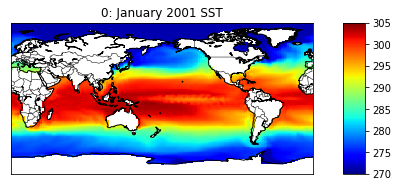

In [16]:
mytitle="0: January 2001 SST"
data2d = sst[0,:,:] 
iwant( data2d[85,100] , 301.947509766 )

# plotpixels requires: the x coordinates 1-D array,
# the y coordinates 1-D array, a data2d 2-D array,
# with the y-index first (latitude direction) and 
# the x-index second (longitude).
# hic sets the value mapped to the highest color, 
# lowc sets the value mapped to the lowest color
plotpixels2(lon1d, lat1d, data2d, hic=305, lowc=270,
        title = mytitle, outfile=pdir+'Jan2001.png')

1.483642578125  Value correct!
...doing plotpixels:
min data:  -2.911102294921875    max data: 2.911102294921875
low color bound: -2.911102294921875   high color bound: 2.911102294921875
saved plot to  bunchofplots/Equator.png 



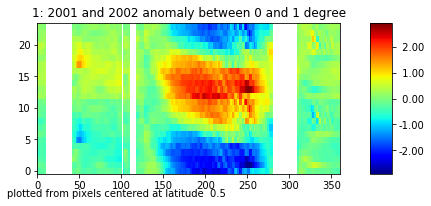

In [17]:
lat_index = 80 
mytitle = "1: 2001 and 2002 anomaly between 0 and 1 degree"
mycaption = "plotted from pixels centered at latitude %4.1f" \
 % lat1d[lat_index]
data2d = anomaly[:,lat_index,:] # a 2D slice 
iwant( data2d[10,100] , 1.48364257812 )
months = range(data2d.shape[0]) # will be an array containing 0,1,...23
plotpixels2(lon1d, months, data2d, title=mytitle,
    outfile = pdir+'Equator.png', needmap=False, caption=mycaption)
# Note for a Hovmoeller diagram, the x coordinate is longitude
# and y coordinate is months. 
# A map overlay is not possible.
# Also, we choose not to specify hic and lowc. 
# plotpixels selects useful values.

1.024139404296875  Value correct!
...doing plotpixels:
min data:  -3.3265380859375    max data: 5.956451416015625
low color bound: -6   high color bound: 6
overlaying map on pixels
saved plot to  bunchofplots/FebDiff.png 



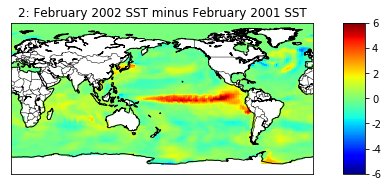

In [18]:
mytitle="2: February 2002 SST minus February 2001 SST"
data2d = sst[13,:,:] - sst[1,:,:] # In Python, February is 1 and 13!
iwant( data2d[85,100] , 1.0241394043  )
plotpixels2(lon1d, lat1d, data2d , hic=6, lowc=-6, 
        title=mytitle, outfile=pdir+'FebDiff.png')

303.30840555826825  Value correct!
...doing plotpixels:
min data:  271.31225713094074    max data: 303.6828422546387
low color bound: 270   high color bound: 305
overlaying map on pixels
saved plot to  bunchofplots/AnnualMean.png 



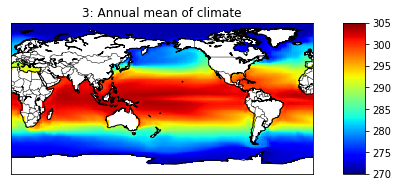

In [19]:
# Hint: .mean(0) is a mean over the 0 index,
# which for climate is ALL the 12 months...
mytitle="3: Annual mean of climate" 
data2d = climate[:,:,:].mean(0)  
iwant( data2d[85,100] , 303.308405558 )
plotpixels2(lon1d, lat1d, data2d, hic=305, lowc=270,
    title=mytitle, outfile=pdir+'AnnualMean.png')

302.75836181640625  Value correct!
...doing plotpixels:
min data:  271.3182423909505    max data: 304.9188181559245
low color bound: 270   high color bound: 305
overlaying map on pixels
saved plot to  bunchofplots/JFM.png 



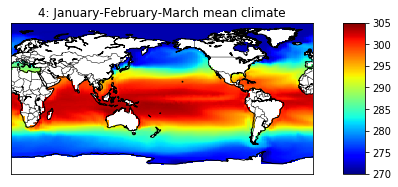

In [20]:
# Similar to above, but use the slice syntax with the .mean method.
mytitle="4: January-February-March mean climate"
data2d = climate[0:3,:,:].mean(0) 
iwant( data2d[85,100] , 302.758361816 )
plotpixels2(lon1d, lat1d, data2d , hic=305, lowc=270,
    title=mytitle, outfile=pdir+'JFM.png')

303.7488606770833  Value correct!
...doing plotpixels:
min data:  271.307612101237    max data: 304.45018513997394
low color bound: 270   high color bound: 305
overlaying map on pixels
saved plot to  bunchofplots/JAS.png 



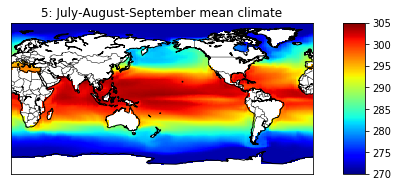

In [21]:
#similar to above
mytitle="5: July-August-September mean climate"
data2d = climate[6:9,:,:].mean(0)
iwant( data2d[85,100] ,303.748860677  )
plotpixels2(lon1d, lat1d, data2d, hic=305, lowc=270,
    title=mytitle, outfile=pdir+'JAS.png')

6: Annual range in climate
1.276123046875  Value correct!
...doing plotpixels:
min data:  0.035888671875    max data: 23.1513671875
low color bound: 0   high color bound: 25
overlaying map on pixels
saved plot to  bunchofplots/AnnualRange.png 



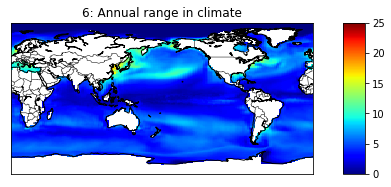

In [22]:
mytitle="6: Annual range in climate"
print(mytitle)
data2d = climate[:,:,:].max(0) - climate[:,:,:].min(0)
iwant( data2d[85,100] , 1.27612304688  )
plotpixels2(lon1d, lat1d, data2d, hic=25, lowc=0,
    title=mytitle, outfile=pdir+'AnnualRange.png')

7: 2001 and 2002 anomaly between 5 S and 5 N
pixel centers from  -4.5 to   4.5
1.070343017578125  Value correct!
...doing plotpixels:
min data:  -2.2411422729492188    max data: 2.2411422729492188
low color bound: -2.2411422729492188   high color bound: 2.2411422729492188
saved plot to  bunchofplots/5S5N.png 



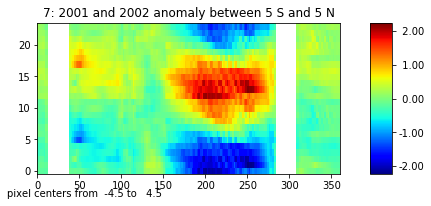

In [23]:
mytitle="7: 2001 and 2002 anomaly between 5 S and 5 N"
print(mytitle)
lia=75 # starting latitude index
lib=85 # ending latitude index
mycaption="pixel centers from %5.1f to %5.1f" % ( lat1d[lia],lat1d[lib-1]) 
print(mycaption)
data2d = anomaly[:,lia:lib,:].mean(1) 
iwant( data2d[10,100] , 1.07034301758 )
months = range(data2d.shape[0])
plotpixels2(lon1d, months, data2d, title=mytitle, caption=mycaption,
    outfile=pdir+'5S5N.png',  needmap=False)

## A 1-D plot from METR 1313 
Let's be sure we can make 1-dimensional plots. Just one example here.

the shape of data1d: (24,)


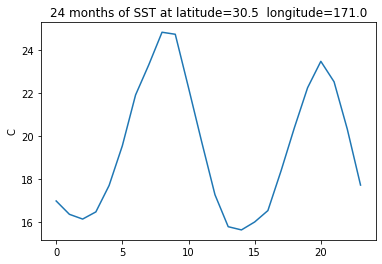

In [24]:
fig,ax = plt.subplots()
lati = 110  
loni = 85
data1d = sst[:,lati,loni] - 273.15 #convert to Celsius
print("the shape of data1d:", data1d.shape )
ax.plot(data1d) # keep it simple
mytitle = "24 months of SST at latitude=%4.1f  longitude=%5.1f" % \
        (lat1d[lati], lon1d[loni])
ax.set_title(mytitle)
ax.set_ylabel('C');

<hr style="height:6px;border:none;background-color:#f00;" />

# Student Tasks

At your password-protected website, you need to offer 3 animations,
like those here http://metr1313.net/~bonzo/sst.html

To make the animations, use [this code](https://code.activestate.com/recipes/580675-makes-html-with-javascript-to-animate-a-sequence-o). Download the python file and name it `janim.py`. Below I show how to `import janim` as a module and use the function `makeanim`.  It is quite simple.

You might feel your ability with numpy arrays is not stressed in this task. This task is more about basic html, uploading files, including zip files, and manipulating this files with the Linux operating system that hosts your website.  You will need to know about [zip and unzip on the Linux command line](http://www.hostingadvice.com/how-to/unzip-file-linuxubuntu/).  If using MobaXterm from Windows, transferring files is simple as dragging and dropping. From OSX, heed my 
[tips here](http://metr1313.net/lessons/Tips#Copying_a_file_to.2Ffrom_your_Mac_or_Linux_PC_from.2Fto_metr1313.net)

Other tasks in METR 4330/5330 will stress expertise with numpy arrays, so hopefully you acquired some ability in this task, even though such ability was not thoroughly tested.

In [36]:
from janim import makeanim
import glob
from IPython.display import display,clear_output,Image
import time as Time

Be patient while the loop below runs...

0 2002 1 0000.png
...doing plotpixels:
min data:  271.29676818847656    max data: 305.04380798339844
low color bound: 270   high color bound: 305
overlaying map on pixels
saved plot to  climatedir/0000.png 



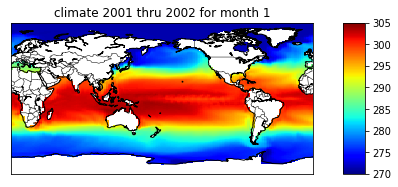

1 2002 2 0001.png
...doing plotpixels:
min data:  271.3080749511719    max data: 305.07850646972656
low color bound: 270   high color bound: 305
overlaying map on pixels
saved plot to  climatedir/0001.png 



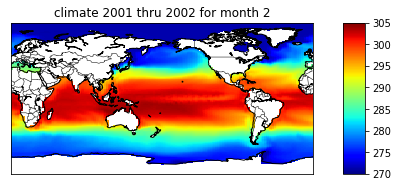

2 2002 3 0002.png
...doing plotpixels:
min data:  271.3286437988281    max data: 304.8974914550781
low color bound: 270   high color bound: 305
overlaying map on pixels
saved plot to  climatedir/0002.png 



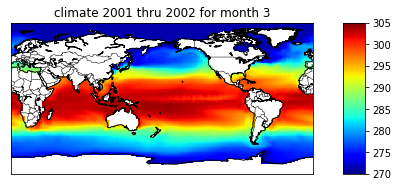

3 2002 4 0003.png
...doing plotpixels:
min data:  271.28765869140625    max data: 304.5142364501953
low color bound: 270   high color bound: 305
overlaying map on pixels
saved plot to  climatedir/0003.png 



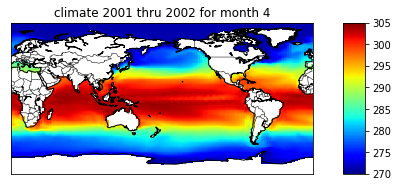

4 2002 5 0004.png
...doing plotpixels:
min data:  271.2492370605469    max data: 304.3649444580078
low color bound: 270   high color bound: 305
overlaying map on pixels
saved plot to  climatedir/0004.png 



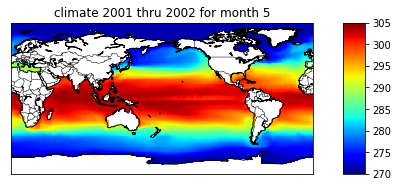

5 2002 6 0005.png
...doing plotpixels:
min data:  271.2705841064453    max data: 304.2556610107422
low color bound: 270   high color bound: 305
overlaying map on pixels
saved plot to  climatedir/0005.png 



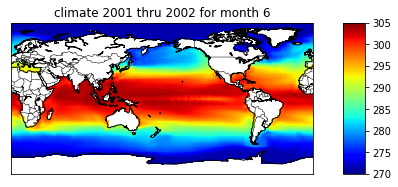

6 2002 7 0006.png
...doing plotpixels:
min data:  271.30328369140625    max data: 304.3953399658203
low color bound: 270   high color bound: 305
overlaying map on pixels
saved plot to  climatedir/0006.png 



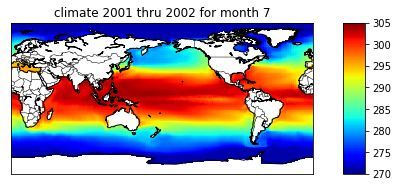

7 2002 8 0007.png
...doing plotpixels:
min data:  271.3067169189453    max data: 304.3287353515625
low color bound: 270   high color bound: 305
overlaying map on pixels
saved plot to  climatedir/0007.png 



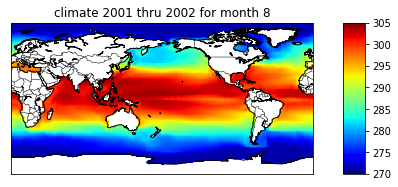

8 2002 9 0008.png
...doing plotpixels:
min data:  271.3015899658203    max data: 304.62648010253906
low color bound: 270   high color bound: 305
overlaying map on pixels
saved plot to  climatedir/0008.png 



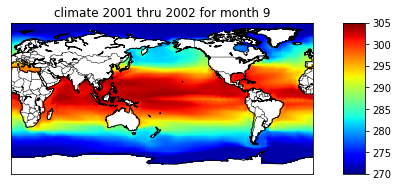

9 2002 10 0009.png
...doing plotpixels:
min data:  271.27581787109375    max data: 304.3206787109375
low color bound: 270   high color bound: 305
overlaying map on pixels
saved plot to  climatedir/0009.png 



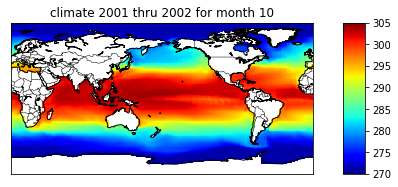

10 2002 11 0010.png
...doing plotpixels:
min data:  271.2121887207031    max data: 304.1636199951172
low color bound: 270   high color bound: 305
overlaying map on pixels
saved plot to  climatedir/0010.png 



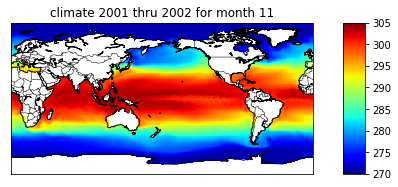

11 2002 12 0011.png
...doing plotpixels:
min data:  271.20484924316406    max data: 304.78692626953125
low color bound: 270   high color bound: 305
overlaying map on pixels
saved plot to  climatedir/0011.png 



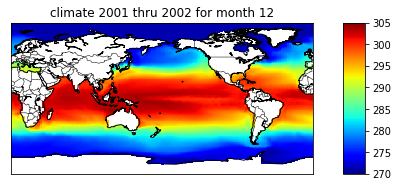

In [58]:
pngdir = 'climatedir/' # an empty directory with a suitable name
if not os.path.exists(pngdir): os.mkdir(pngdir)
for i in range(12):
#     year = 2001 + i//12
    month = i%12 + 1
    plottitle = 'climate 2001 thru 2002 for month %d' % ( month)
    pngname = '%0.4d.png' % i
    print(i,year,month,pngname)
    data2d=climate[i,:,:]
    plotpixels2(lon1d, lat1d, data2d, hic=305, lowc=270,
    title = plottitle, outfile=pngdir+pngname)  

In [49]:
pngs = glob.glob(pngdir+'*.png') # the * matches anything
#if using Windows, get rid of file paths that use \
pngsfixed = [x.replace('\\','/') for x in pngs] # fixes Windows
print(pngs)
print(pngsfixed)

['climatedir/0006.png', 'climatedir/0007.png', 'climatedir/0011.png', 'climatedir/0005.png', 'climatedir/0004.png', 'climatedir/0010.png', 'climatedir/0000.png', 'climatedir/0001.png', 'climatedir/0003.png', 'climatedir/0002.png', 'climatedir/0009.png', 'climatedir/0008.png']
['climatedir/0006.png', 'climatedir/0007.png', 'climatedir/0011.png', 'climatedir/0005.png', 'climatedir/0004.png', 'climatedir/0010.png', 'climatedir/0000.png', 'climatedir/0001.png', 'climatedir/0003.png', 'climatedir/0002.png', 'climatedir/0009.png', 'climatedir/0008.png']


Below, we show how to display, within the notebook, an animation of saved image files.

In [50]:
#locally, we use pngs in all OS
pngs.sort() # probably not needed, pngs is already sorted
n=0 #image counter
nloopmax = 3 # set =0 to prevent this cell from running
nloop = 0 #loop counter
while nloop < nloopmax:
    png = pngs[n]
    n+=1
    if n >= len(pngs): #go back to first image
        n = 0
        nloop += 1
    display(Image(filename=png))
    Time.sleep(0.3) # time interval between frames in seconds
    clear_output(wait=True)
print("completed",nloop,"loops of animation")


completed 3 loops of animation


Next we make the HTML file that can animate the image files.  You will need to make three web pages, one each for `sst` `climate` and `anomaly`

In [53]:
# note we use pngsfixed here to make the web page
makeanim(pngsfixed,outfile="climate.html",sortOrder=True,
         ctlOnSide=True,titlestring="Animation of SST")

Now open the file you made locally in your browser: [myanimator.html](myanimator.html).  The javascript embedded in the file controls the animation. Make three such animations and offer the animations at your password-protected website.